# Finding Significant CNVs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac

C:\Users\chels\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install --upgrade cptac

Requirement already up-to-date: cptac in c:\users\chels\anaconda3\lib\site-packages (0.8.0)


## Download CNV Data

In [3]:
cptac.list_datasets()

Available datasets:

Dataset name                               Description     Data reuse status  \
                                                                               
Brca                                     breast cancer       no restrictions   
Ccrcc         clear cell renal cell carcinoma (kidney)       no restrictions   
Colon                                colorectal cancer       no restrictions   
Endometrial            endometrial carcinoma (uterine)       no restrictions   
Gbm                                       glioblastoma   publication embargo   
Hnscc                                    head and neck  password access only   
Lscc                      lung squamous cell carcinoma  password access only   
Luad                               lung adenocarcinoma   publication embargo   
Ovarian               high grade serous ovarian cancer       no restrictions   

Dataset name                              Publication link  
                                     

In [4]:
cptac.download(dataset="endometrial")

True

In [5]:
cptac.download(dataset="brca")

True

In [6]:
cptac.download(dataset="ccrcc")

True

In [7]:
cptac.download(dataset="gbm")

True

In [9]:
cptac.download(dataset="hnscc")

True

In [11]:
cptac.download(dataset="luad")

True

In [12]:
cptac.download(dataset="ovarian")

True

In [28]:
cptac.download(dataset="colon")

cptac warning: Downloading new version of colon dataset: 0.0.1. This will now be the default version when the dataset is loaded. If you wish to load an older version of the data, you must specify it with the 'version' parameter when you load the dataset. (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 1)


True

In [71]:
cptac.download(dataset="lscc")

Password for lscc dataset: ········      


True

In [13]:
en = cptac.Endometrial()
brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
gbm = cptac.Gbm()
hnscc = cptac.Hnscc()
luad = cptac.Luad()
ovarian = cptac.Ovarian()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 4)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 5)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 6)


In [29]:
colon = cptac.Colon()

In [72]:
lscc = cptac.Lscc()

cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py, line 1)


In [14]:
en_cnv = en.get_CNV()
brca_cnv = brca.get_CNV()
ccrcc_cnv = ccrcc.get_CNV()
gbm_cnv = gbm.get_CNV()
hnscc_cnv = hnscc.get_CNV()
luad_cnv = luad.get_CNV()
ovarian_cnv = ovarian.get_CNV()

In [30]:
colon_cnv = colon.get_CNV()

In [73]:
lscc_cnv = lscc.get_CNV()

## Create Summary Tables

In [31]:
def separate(hiCut, lowCut, data):
  """
  Counts the Number of patients with high and low value for each gene.
  """
  sepDict = dict()
  for column in data:
    numHi = 0
    numLow = 0
    numNeu = 0
    for i in data[column]:
      if i > hiCut:
        numHi += 1
      elif i < lowCut:
        numLow += 1
      else:
        numNeu += 1 
    sepDict[column] = [numHi, numNeu, numLow]
  return sepDict

In [35]:
def get_counts_and_average(data):
  """
  Takes a CNV dataframe and generates a dataframe with the counts of high, low and neutral values
  """
  df = pd.DataFrame(data = separate(.3,-.2,data), index = ["high", "neutral", "low"])
  df = df.append(pd.DataFrame(data.mean(0), columns=['average']).transpose(), sort=True)
  return df.transpose()

In [36]:
en_counts = get_counts_and_average(en_cnv)
gbm_counts = get_counts_and_average(gbm_cnv)
brca_counts = get_counts_and_average(brca_cnv)
hnscc_counts = get_counts_and_average(hnscc_cnv)
luad_counts = get_counts_and_average(luad_cnv)
ovarian_counts = get_counts_and_average(ovarian_cnv)
ccrcc_counts = get_counts_and_average(ccrcc_cnv)
colon_counts = get_counts_and_average(colon_cnv)

In [74]:
lscc_counts = get_counts_and_average(lscc_cnv)

In [75]:
lscc_counts

,high,neutral,low,average
Name,,,,
A1BG,6.0,86.0,18.0,-0.013685
A1CF,3.0,85.0,22.0,-0.065994
A2M,19.0,86.0,5.0,0.147068
A2ML1,19.0,86.0,5.0,0.134705
A3GALT2,0.0,85.0,25.0,-0.090937
...,...,...,...,...
ZXDC,30.0,77.0,3.0,0.185132
ZYG11A,1.0,86.0,23.0,-0.078448
ZYG11B,1.0,86.0,23.0,-0.081067


## Finding Significant Genes in each Cancer Type

In [44]:
en_sig_genes_up = list(en_counts[en_counts.high >= 20].index)
gbm_sig_genes_up = list(gbm_counts[gbm_counts.high >= 20].index)
brca_sig_genes_up = list(brca_counts[brca_counts.high >= 20].index)
hnscc_sig_genes_up = list(hnscc_counts[hnscc_counts.high >= 20].index)
luad_sig_genes_up = list(luad_counts[luad_counts.high >= 20].index)
ovarian_sig_genes_up = list(ovarian_counts[ovarian_counts.high >= 20].index)
ccrcc_sig_genes_up = list(ccrcc_counts[ccrcc_counts.high >= 20].index)
colon_sig_genes_up = list(colon_counts[colon_counts.high >= 20].index)

In [76]:
lscc_sig_genes_up = list(lscc_counts[lscc_counts.high >= 20].index)

In [68]:
print(brca_sig_genes_up[0])

('7SK', 'ENSG00000254144.2')


In [55]:
en_sig_genes_down = list(en_counts[en_counts.low >= 20].index)
gbm_sig_genes_down = list(gbm_counts[gbm_counts.low >= 20].index)
brca_sig_genes_down = list(brca_counts[brca_counts.low >= 20].index)
hnscc_sig_genes_down = list(hnscc_counts[hnscc_counts.low >= 20].index)
luad_sig_genes_down = list(luad_counts[luad_counts.low >= 20].index)
ovarian_sig_genes_down = list(ovarian_counts[ovarian_counts.low >= 20].index)
ccrcc_sig_genes_down = list(ccrcc_counts[ccrcc_counts.low >= 20].index)
colon_sig_genes_down = list(colon_counts[colon_counts.low >= 20].index)

In [77]:
lscc_sig_genes_down = list(lscc_counts[lscc_counts.low >= 20].index)

In [94]:
print(gbm_sig_genes_down)

['A1CF', 'A4GALT', 'ABCC2', 'ABCC4', 'ABCD4', 'ABHD12B', 'ABHD13', 'ABHD4', 'ABI1', 'ABLIM1', 'ABRACL', 'ABRAXAS2', 'AC001226.2', 'AC004832.3', 'AC004997.1', 'AC005520.1', 'AC007375.1', 'AC022400.6', 'AC067752.1', 'AC068896.1', 'ACADSB', 'ACAT2', 'ACBD5', 'ACBD7', 'ACER2', 'ACIN1', 'ACO1', 'ACO2', 'ACOD1', 'ACOT1', 'ACOT2', 'ACOT4', 'ACOT6', 'ACR', 'ACSL5', 'ACSM6', 'ACTA2', 'ACTN1', 'ACTR10', 'ACTR1A', 'ACYP1', 'ADA2', 'ADAM12', 'ADAM20', 'ADAM21', 'ADAM8', 'ADAMTS14', 'ADAMTSL1', 'ADARB2', 'ADAT2', 'ADCK1', 'ADCY4', 'ADD3', 'ADGB', 'ADGRA1', 'ADGRG6', 'ADIRF', 'ADK', 'ADM2', 'ADO', 'ADORA2A', 'ADRA2A', 'ADRB1', 'ADSL', 'ADSSL1', 'AFAP1L2', 'AFDN', 'AFG1L', 'AGAP4', 'AGAP5', 'AGAP6', 'AGAP9', 'AGPAT4', 'AHI1', 'AHNAK2', 'AHSA1', 'AIFM2', 'AIG1', 'AJUBA', 'AK3', 'AK7', 'AK9', 'AKAP11', 'AKAP5', 'AKAP6', 'AKAP7', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AKR1C4', 'AKR1C8P', 'AKR1E2', 'AKT1', 'AL022238.4', 'AL022312.1', 'AL022318.4', 'AL049779.1', 'AL049839.2', 'AL049844.1', 'AL096711.2', 'AL096870

In [102]:
chromosomes = pd.read_csv('uniprot_chromosomes.csv')

In [103]:
chromosomes = chromosomes.drop(columns=['Unnamed: 0'])

## Common Sig Genes

In [143]:
def CountFrequency(my_list): 
  """
  Counts the frequency of the gene in the given list.
  Returns a list of genes that appeared 3 or more times.
  """
  freq = {} 
  for items in my_list: 
      freq[items] = my_list.count(items) 
  sig = []
  for key, value in freq.items(): 
    if value > 4:
      sig.append(key)
  return sig

In [144]:
sig_genes_up = CountFrequency(en_sig_genes_up +
                              gbm_sig_genes_up +
                              brca_sig_genes_up +
                              hnscc_sig_genes_up +
                              luad_sig_genes_up +
                              ovarian_sig_genes_up +
                              ccrcc_sig_genes_up +
                              colon_sig_genes_up +
                              lscc_sig_genes_up)

In [95]:
sig_genes_down = CountFrequency(en_sig_genes_down +
                                gbm_sig_genes_down +
                                brca_sig_genes_down +
                                hnscc_sig_genes_down +
                                luad_sig_genes_down +
                                ovarian_sig_genes_down +
                                ccrcc_sig_genes_down +
                                colon_sig_genes_down +
                                lscc_sig_genes_down)

In [145]:
sig_genes_up_df = chromosomes[chromosomes.gene.isin(sig_genes_up)]

In [146]:
sig_genes_up_df['chromosome'] = sig_genes_up_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
print(sig_genes_up_df)

Empty DataFrame
Columns: [gene, chromosome]
Index: []


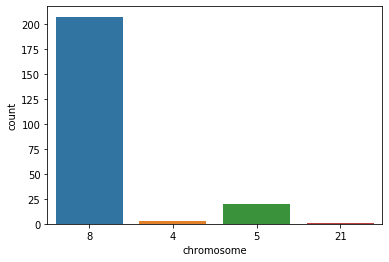

In [147]:
sns.countplot(x='chromosome', data=sig_genes_up_df)

In [119]:
sig_genes_down_df = chromosomes[chromosomes.gene.isin(sig_genes_down)]

In [120]:
sig_genes_down_df['chromosome'] = sig_genes_down_df['chromosome'].str.extract(pat='([0-9,X,Y]+)')

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


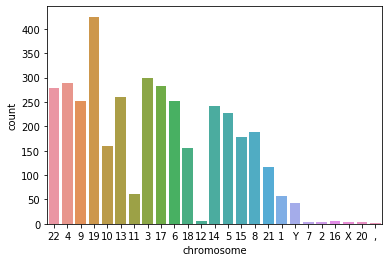

In [121]:
sns.countplot(x='chromosome', data=sig_genes_down_df)